# Loan prediction using machine learning

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

In [ ]:
# loading dataset
train_path = "/home/cs/Projects/Data_science/Datasets/Loan_prediction/train.csv"
test_path = "/home/cs/Projects/Data_science/Datasets/Loan_prediction/test.csv"
train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

In [ ]:
origianl_df = train_df.copy() # keep a copy of train df
train_df.shape

(614, 13)

## Data exploration

In [ ]:
train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [66]:
train_df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [67]:
train_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [68]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [69]:
train_df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [70]:
# checking if data have some missing value
train_df.isna().values.any()

True

In [71]:
train_df.isna().sum() # sum missing values for each columns

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<Figure size 864x576 with 0 Axes>

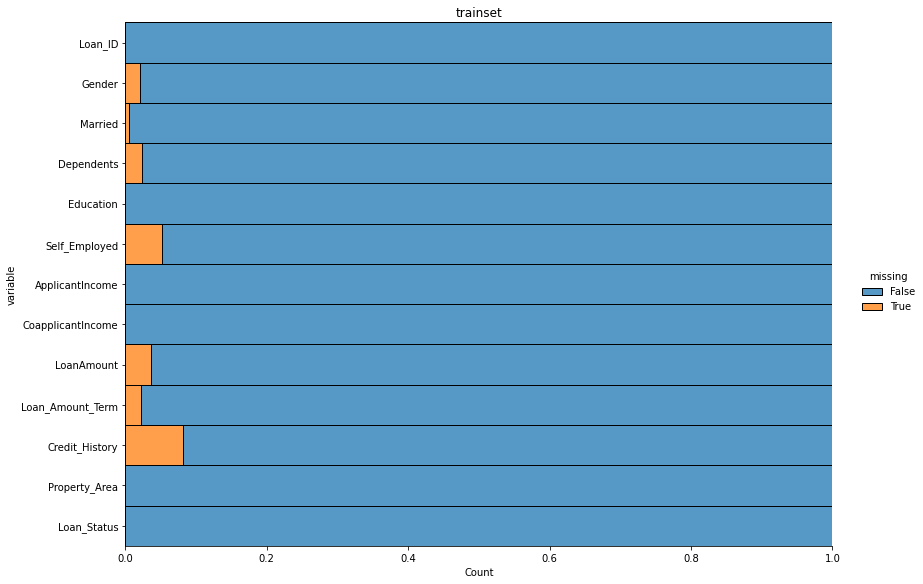

In [72]:
# Visualize missing values in train df
plt.figure(figsize = (12, 8))
sns.displot(data = train_df.isna().melt(value_name="missing"),
            y="variable",
            hue="missing",
            aspect= 1.5,
            multiple="fill",
            height=8
            )
plt.title('trainset')
plt.show()

<Figure size 864x576 with 0 Axes>

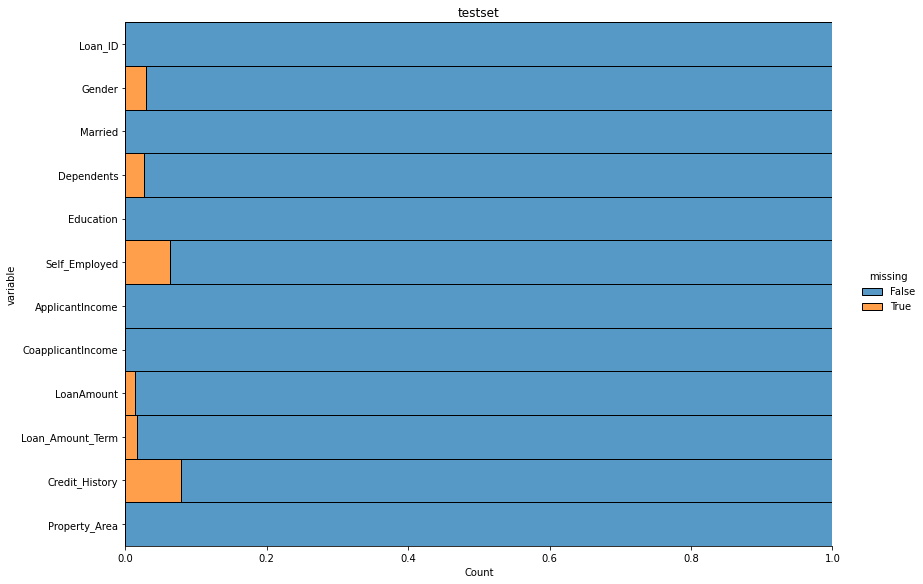

In [73]:
# Visualize missing values in test df
plt.figure(figsize = (12, 8))
sns.displot(data = test_df.isna().melt(value_name="missing"),
            y="variable",
            hue="missing",
            aspect= 1.5,
            multiple="fill",
            height=8
            )
plt.title('testset')
plt.show()

##  Data preprocessing

### imputation

In [74]:
# impute trainset categorical missing values by mode
impute_object_list = ["Gender","Married", "Dependents", "Self_Employed"]
for ob in impute_object_list:
    print(ob, ':', train_df[ob].mode())
    train_df[ob].fillna(train_df[ob].mode()[0], inplace=True)
    print(train_df[ob].isna().values.any())
    print("--------------------------------")

Gender : 0    Male
dtype: object
False
--------------------------------
Married : 0    Yes
dtype: object
False
--------------------------------
Dependents : 0    0
dtype: object
False
--------------------------------
Self_Employed : 0    No
dtype: object
False
--------------------------------


In [75]:
# impute testset categorical missing values by mode
impute_object_list = ["Gender","Married", "Dependents", "Self_Employed"]
for ob in impute_object_list:
    print(ob, ':', test_df[ob].mode())
    test_df[ob].fillna(test_df[ob].mode()[0], inplace=True)
    print(test_df[ob].isna().values.any())
    print("--------------------------------")

Gender : 0    Male
dtype: object
False
--------------------------------
Married : 0    Yes
dtype: object
False
--------------------------------
Dependents : 0    0
dtype: object
False
--------------------------------
Self_Employed : 0    No
dtype: object
False
--------------------------------


In [76]:
# impute train and test number missing values by median
num_train_list = ["LoanAmount", "Loan_Amount_Term"]

for var in num_train_list:
    train_df[var].fillna(train_df[var].median(), inplace=True)
    test_df[var].fillna(test_df[var].median(), inplace=True)
    print(train_df[var].isna().values.any())
    print(test_df[var].isna().values.any())


False
False
False
False


In [77]:
# impute train and test number missing values by last valid observation forward to next valid
train_df["Credit_History"].fillna(method='ffill', inplace=True)
test_df["Credit_History"].fillna(method='ffill', inplace=True)
print(test_df[var].isna().values.any())
print(train_df[var].isna().values.any())

False
False


In [78]:
train_df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [79]:
test_df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

### Some visualization

In [80]:
object_col = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed','Property_Area']

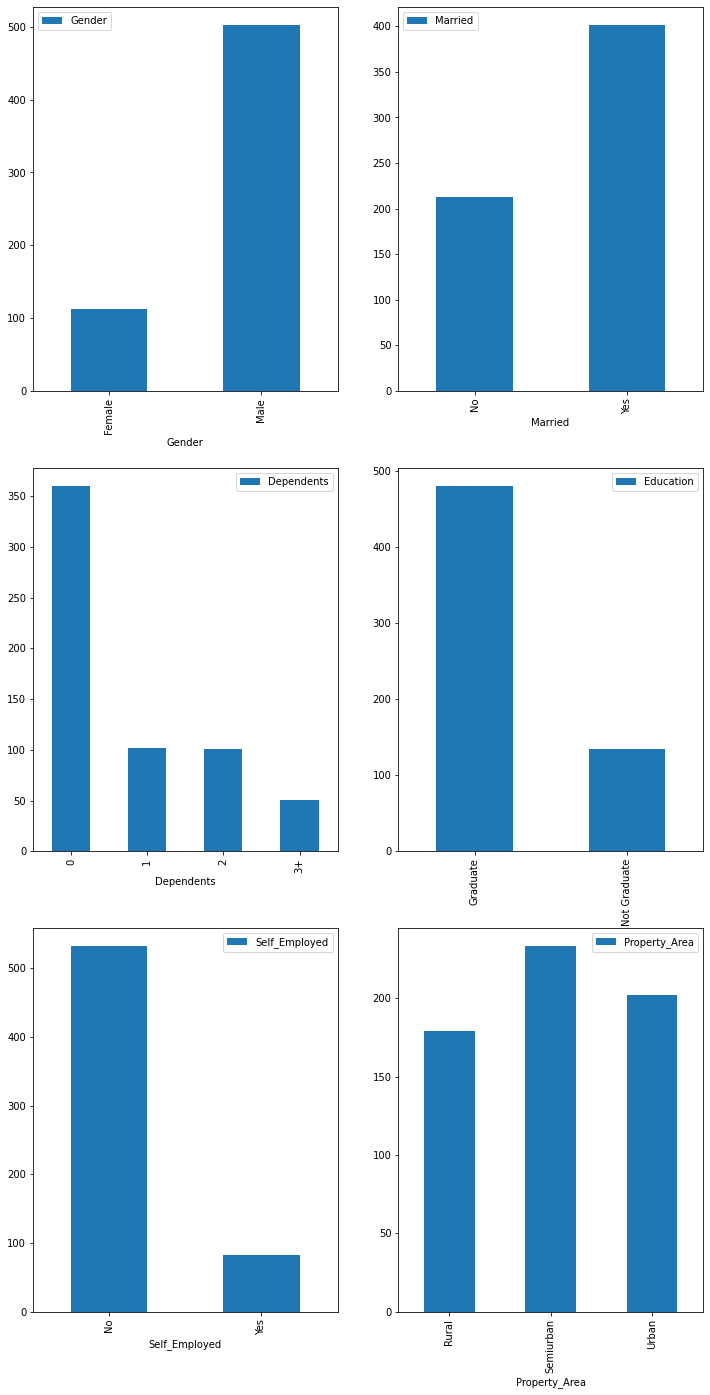

In [81]:
plt.figure(figsize =(12, 24))
for i in range(0,len(object_col)):
    plt.subplot(3, 2 , i+1)
    train_df.groupby([object_col[i]])[object_col[i]].count().plot.bar(label =object_col[i])
    plt.legend()
plt.show()

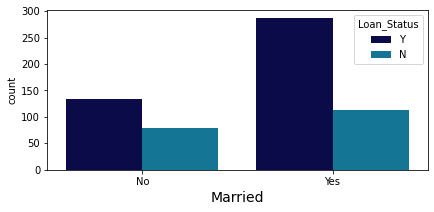

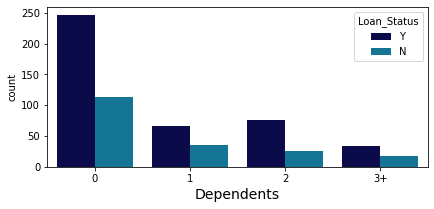

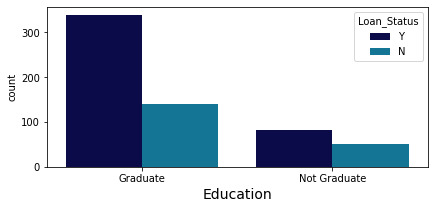

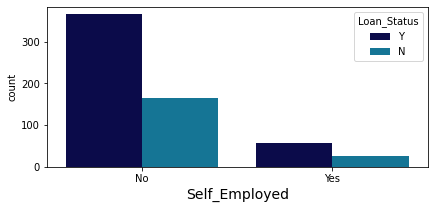

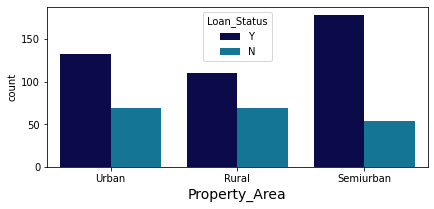

In [82]:
for i in object_col[1:]: 
    plt.figure(figsize=(15,10))
    plt.subplot(3,2,1)
    sns.countplot(x=i ,hue='Loan_Status', data=train_df, palette='ocean')
    plt.xlabel(i, fontsize=14)

### Encoding

In [85]:
X = train_df.drop(["Loan_Status", "Loan_ID"], axis =1) # delete Loan_Status, Loan_ID in dataset, because they ont important for training
X_test = test_df.drop("Loan_ID", axis=1)
y = train_df['Loan_Status']
label_transform = LabelEncoder()
y = label_transform.fit_transform(y)

In [87]:
num_col = X.select_dtypes(exclude=object).columns # for categorical values 
cat_col = X.select_dtypes(include=object).columns # for numerical values

In [88]:
# categorical values encoding with LabelEncoder
for c in cat_col:
    X[c] = label_transform.fit_transform(X[c].astype(str))

In [89]:
X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2


In [90]:
x_train ,x_val ,y_train, y_val = train_test_split(X , y, test_size=0.3, random_state=0) # split to train and validation set

In [93]:
print("train shape : ", x_train.shape)
print("validation shape :", x_val.shape)

train shape :  (429, 11)
validation shape : (185, 11)


## Building Machine learning models and train them

In [94]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.metrics import accuracy_score

#### Random forest

In [95]:
# Data Standardization using sklean column transformer
preprocesor_transformer = make_column_transformer((StandardScaler(), num_col))
# We use sklean pipeline to preprocesor and fit models
rf_model= make_pipeline(preprocesor_transformer, RandomForestClassifier())
rf_model.fit(x_train, y_train)
print(rf_model.score(x_train, y_train))
print(rf_model.score(x_val, y_val))

1.0
0.8162162162162162


#### KNN 

In [96]:
preprocesor_transformer = make_column_transformer((StandardScaler(), num_col))
knn_model= make_pipeline(preprocesor_transformer, KNeighborsClassifier())
knn_model.fit(x_train, y_train)
knn_model.score(x_val, y_val)

0.8162162162162162

#### Decision Tree

In [97]:
preprocesor_transformer = make_column_transformer((StandardScaler(), num_col))
dt_model= make_pipeline(preprocesor_transformer, DecisionTreeClassifier())
dt_model.fit(x_train, y_train)
dt_model.score(x_val, y_val)

0.7081081081081081

#### Suport vector machine (SVM)

In [99]:
preprocesor_transformer = make_column_transformer((StandardScaler(), num_col))
svm_model= make_pipeline(preprocesor_transformer, SVC())
svm_model.fit(x_train, y_train)
print('train_accuracy :',svm_model.score(x_train, y_train))
print('val_accuracy :',svm_model.score(x_val, y_val))

train_accuracy : 0.8018648018648019
val_accuracy : 0.8378378378378378


### Logistic Regression

In [100]:
preprocesor_transformer = make_column_transformer((StandardScaler(), num_col))
lr_model= make_pipeline(preprocesor_transformer, LogisticRegression())
lr_model.fit(x_train, y_train)
print('train_accuracy :',lr_model.score(x_train, y_train))
print('val_accuracy :',lr_model.score(x_val, y_val))

train_accuracy : 0.7948717948717948
val_accuracy : 0.8432432432432433


### Use Grid search cv with radom forest classifier

In [54]:
params = {'n_estimators': np.arange(100, 1000, 100)}
grid = GridSearchCV(RandomForestClassifier(), param_grid=params, cv = 5)
grid.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'n_estimators': array([100, 200, 300, 400, 500, 600, 700, 800, 900])})

In [55]:
grid.best_score_

0.7878796169630642

In [56]:
import pickle

In [57]:
# Save best models using pickle
pickle.dump(lr_model, open('lr_model.sav', 'wb'))
pickle.dump(svm_model, open('svm_model.sav', 'wb'))
pickle.dump(rf_model, open('rf_model.sav', 'wb'))